### Sec 14. Singular Value Decomposition

#### 150. compute U from eigendecomposition
- reasoning: 
  - A = U S Vt, then AtA = V S^2 Vt because U is orthogonal, so V can be computed using eigendecomposition of AtA 
  - Avi = ui si, then ui = Avi / si, so any column of ui can be computed
- target: create U using only A,V and L(lambda from eigendecomposition)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.26 -0.09 -0.52  0.13 -0.79  0.1 ]
 [-0.41 -0.72  0.01 -0.25 -0.16 -0.47]
 [ 0.17 -0.62 -0.1   0.56  0.33  0.39]
 [-0.54  0.25  0.08  0.74 -0.16 -0.25]
 [-0.29  0.14 -0.84 -0.1   0.41 -0.06]
 [-0.6  -0.02  0.08 -0.23 -0.19  0.74]]
[[ 0.26 -0.09 -0.52  0.27 -0.3  -0.81]
 [-0.41 -0.72  0.01 -0.41 -0.05 -0.06]
 [ 0.17 -0.62 -0.1   0.62 -0.2   0.18]
 [-0.54  0.25  0.08  0.56 -0.79 -0.25]
 [-0.29  0.14 -0.84 -0.18  0.18  0.43]
 [-0.6  -0.02  0.08  0.16  0.47 -0.24]]


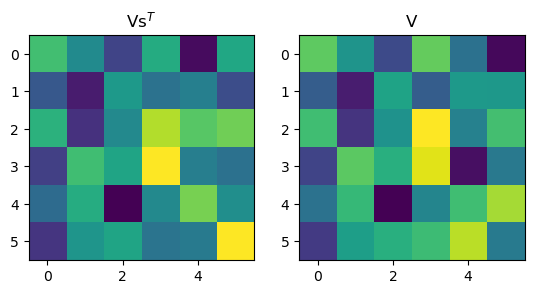

In [76]:
# create a random matrix
m,n = 3,6
A = np.random.randn(m,n)

# full SVD
Us, Ss, Vs = np.linalg.svd(A)
print(np.round(Vs.T,2))

# eig of AtA
L,V = np.linalg.eig(A.T@A)

# sort eigen solutions
idx = np.argsort(L)[::-1]
L = L[idx]
V = V[:,idx]
print(np.round(V,2))

plt.subplot(121)
plt.imshow(Vs.T)
plt.title('Vs$^T$')
plt.subplot(122)
plt.imshow(np.real(V))
plt.title('V')
plt.show()

Is Vs.T the same as V? 
- not really. sometimes signs are flipped in Vs.T and V
- even if the signs are same, only the first few columns from the column space will show same, but rest will be null space which won't match

In [47]:
# check if V and Vs are the same
print(np.allclose(V, Vs))
print(np.round(Vs.T+V,2))

False
[[ 0.    0.    0.76  0.83 -0.67 -0.16]
 [ 0.   -0.    0.34 -0.62  1.42 -0.2 ]
 [-0.    0.   -1.32  0.36 -0.04 -0.13]
 [ 0.   -0.    0.77  0.41 -0.52 -0.43]
 [-0.    0.    0.32 -0.45  0.62 -0.24]
 [ 0.   -0.    0.93 -0.12  0.18  0.47]]


What's the relationship between Lambda and Sigma values?
- L value is the square of Singular values

In [48]:
# check the relationship between Ss and L
print(Ss)
print(L**0.5)

[2.96176125 2.61193563 1.26027637]
[2.96176125e+00 2.61193563e+00 1.26027637e+00 2.23084538e-08
 9.69032139e-09            nan]


C:\Users\elisa\AppData\Local\Temp\ipykernel_30340\1187236279.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(L**0.5)


In [77]:
# compute U using A,V,L
U = np.zeros((m,m))
for i in range(m):
    U[:,i] = A@V[:,i]/np.sqrt(L[i])

print(U)
print(Us)

[[ 0.19585469  0.33197725  0.92273076]
 [ 0.91094502  0.28678813 -0.29653286]
 [ 0.36307039 -0.89863434  0.24624423]]
[[ 0.19585469  0.33197725  0.92273076]
 [ 0.91094502  0.28678813 -0.29653286]
 [ 0.36307039 -0.89863434  0.24624423]]


In [78]:
# confirm U and Us are the same
print(np.round(U+Us,2))
print(np.round(U-Us,2))

[[ 0.39  0.66  1.85]
 [ 1.82  0.57 -0.59]
 [ 0.73 -1.8   0.49]]
[[ 0.  0.  0.]
 [-0. -0. -0.]
 [ 0.  0. -0.]]


#### 155. When is UVt valid and what's its norm and orthogonality?

- When A is square matrix, then U@Vt is valid, where A = USVt
- the norm of U@Vt is 1, where A is m*m
- if A is symmetric, U = Vt.T, and U@Vt is also identify matrix

In [101]:
# create a random matrix
m = 6
A = np.random.randn(m,m)
# A = A@A.T

# full SVD
U, Ss, Vt = np.linalg.svd(A)

In [102]:
print(np.linalg.norm(U,2))
print(np.linalg.norm(Vt,2))
print(np.linalg.norm(U@Vt.T,2))
print(np.linalg.norm(U@Vt,2))
print(np.sqrt(m))

1.0000000000000002
1.0000000000000004
1.0000000000000002
1.0000000000000004
2.449489742783178


In [103]:
print(np.round(U@U.T,2)) # identity 
print(np.round(U@Vt,2)) # not identity
print(np.round(Vt@Vt.T,2)) # identity

[[ 1.  0. -0.  0. -0. -0.]
 [ 0.  1. -0.  0. -0.  0.]
 [-0. -0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [-0. -0.  0.  0.  1. -0.]
 [-0.  0.  0.  0. -0.  1.]]
[[ 1. -0. -0. -0. -0.  0.]
 [ 0.  1. -0. -0. -0.  0.]
 [ 0.  0.  1.  0.  0. -0.]
 [ 0.  0. -0.  1. -0. -0.]
 [ 0.  0. -0.  0.  1. -0.]
 [-0.  0.  0.  0.  0.  1.]]
[[ 1.  0. -0.  0. -0. -0.]
 [ 0.  1. -0. -0.  0.  0.]
 [-0. -0.  1.  0.  0. -0.]
 [ 0. -0.  0.  1.  0.  0.]
 [-0.  0.  0.  0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]]


#### 159. Create a matrix with desired conditional number

- conditional number: the ratio between the largest and smallest singular value

In [127]:
m,n = 4,8
condnum = 42

# create singular value matrices
s = np.linspace(condnum,1, min(m,n))

S = np.zeros((m,n))
for i in range(min(m,n)):
    S[i,i] = s[i]

# create U and V, making them orthogonal with QR decomp
U, Ur = np.linalg.qr(np.random.randn(m,m))
Vt, Vtr = np.linalg.qr(np.random.randn(n,n))

# create A
A = U@S@Vt

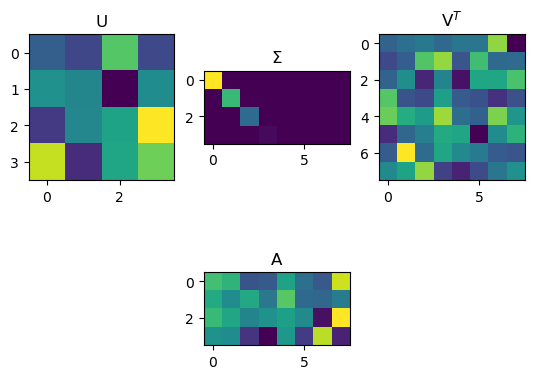

In [129]:
# plot these matrices
plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(Vt)
plt.title('V$^T$')

plt.subplot(235)
plt.imshow(A)
plt.title('A')

plt.show()


In [112]:
# confirm A's conditional number
np.linalg.cond(A)

42.00000000000006

In [123]:
# wrap into a function
def mat_with_cond(m,n,cond):
    # create singular value matrices
    s = np.linspace(cond,1, min(m,n))

    S = np.zeros((m,n))
    for i in range(min(m,n)):
        S[i,i] = s[i]
    
    # create U and V, making them orthogonal with QR decomp
    U, Ur = np.linalg.qr(np.random.randn(m,m))
    Vt, Vtr = np.linalg.qr(np.random.randn(n,n))

    # create A
    A = U@S@Vt

    return A

# test
A = mat_with_cond(16,16,89)
print(A.shape)
print(np.linalg.cond(A))

(16, 16)
89.00000000000034


#### 160. Why we avoid the inverse

- This is to show that the computing error can be huge when comes to big data

In [163]:
# repeat for matrices of size 2-70, and conditional number of 10 to 10^12
diff = np.zeros((69,50))
dims = range(2,72)
condnums = np.linspace(10,10**12,50)

for i in range(69):
    for j in range(50):
        dim = dims[i]
        condnum = condnums[j]
        A = mat_with_cond(dim,dim,condnum)
        Ainv = np.linalg.inv(A)

        diff[i,j] = np.linalg.norm(A@Ainv-np.eye(dim),2)


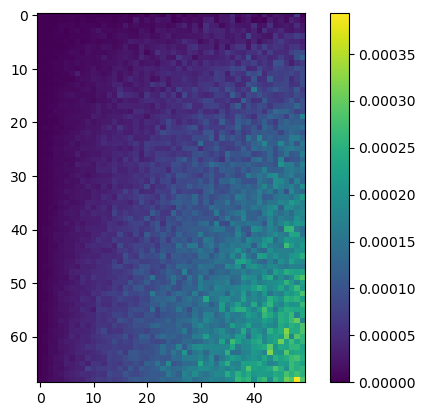

In [164]:
plt.imshow(diff)
plt.colorbar()
plt.show()